In [71]:
import pandas as pd
import numpy as np
from pandas import ExcelFile
import datetime as dt
import matplotlib.pyplot as plt

In [72]:
#Overarching objective: view the average number of 2's vs 3's taken by big men (power forwards
#and centers) from 2000 to 2017

hoops_data = pd.read_excel("NBA+Data.xlsx", sheet_name ="NBA+Data")
hoops_data.head()




,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [73]:
#isolating only the years 2000-2017

hoops_data = hoops_data[hoops_data.Year >= 1990]
hoops_data.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
9547,1990.0,Mark Acres,C,27.0,ORL,80.0,50.0,1691.0,8.3,0.536,...,0.692,154.0,277.0,431.0,67.0,36.0,25.0,70.0,248.0,362.0
9548,1990.0,Michael Adams,PG,27.0,DEN,79.0,74.0,2690.0,15.4,0.542,...,0.850,49.0,176.0,225.0,495.0,121.0,3.0,141.0,133.0,1221.0
9549,1990.0,Mark Aguirre,SF,30.0,DET,78.0,40.0,2005.0,15.8,0.544,...,0.756,117.0,188.0,305.0,145.0,34.0,19.0,121.0,201.0,1099.0
9550,1990.0,Danny Ainge,PG,30.0,SAC,75.0,68.0,2727.0,16.1,0.528,...,0.831,69.0,257.0,326.0,453.0,113.0,18.0,185.0,238.0,1342.0
9551,1990.0,Mark Alarie,PF,26.0,WSB,82.0,10.0,1893.0,14.1,0.510,...,0.812,151.0,223.0,374.0,142.0,60.0,39.0,101.0,219.0,860.0


In [74]:
#finding all different ways big men are listed (anything w/ C or PF)
hoops_data['Pos'].unique()

array(['C', 'PG', 'SF', 'PF', 'SG', 'PF-SF', 'SG-SF', 'SF-SG', 'PG-SG',
       'SG-PG', 'PF-C', 'SF-PF', 'C-PF', 'PG-SF', 'SG-PF', 'C-SF'],
      dtype=object)

In [5]:
#creating a variable for ever different position
c = hoops_data.loc[hoops_data['Pos'] == 'C']
pf = hoops_data.loc[hoops_data['Pos'] == 'PF']
c_pf = hoops_data.loc[hoops_data['Pos'] == 'C-PF']
pf_c = hoops_data.loc[hoops_data['Pos'] == 'PF-C']

In [6]:
#creating the mean 2 pt attempts for each position, including all of '00-'17
c_mean = c['2PA'].mean()
pf_mean = pf['2PA'].mean()
c_pf_mean = c_pf['2PA'].mean()
pf_c_mean = pf_c['2PA'].mean()

In [7]:
#creating a DF for the values to sit into
gross_mean_df = pd.DataFrame({'C':c_mean, "PF": pf_mean,
                             'C/PF': c_pf_mean, 'PF/C': pf_c_mean},
                             index = [0])
gross_mean_df

,C,PF,C/PF,PF/C
0,278.197052,318.230288,234.0,241.733333


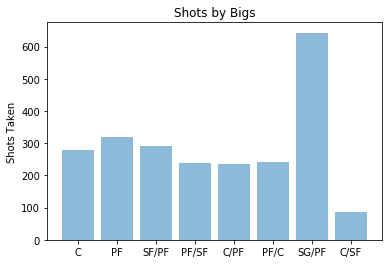

In [8]:
height = [278,318,292,238,234,241,643,87]
x = ('C', 'PF', 'SF/PF','PF/SF','C/PF','PF/C','SG/PF','C/SF')
x_pos = len(x)
width = .35

plt.bar(x, height, align = 'center', alpha = .5)
plt.xticks(x)
plt.ylabel("Shots Taken")
plt.title("Shots by Bigs")

plt.show()

In [9]:
# trying to isolate 2001 the same way I isolated '00-'17
hoops_data_2001 = hoops_data[hoops_data.Year == 2001]
hoops_data_2002 = hoops_data[hoops_data.Year == 2002]
hoops_data_2003 = hoops_data[hoops_data.Year == 2003]
hoops_data_2004 = hoops_data[hoops_data.Year == 2004]
hoops_data_2005 = hoops_data[hoops_data.Year == 2005]
hoops_data_2006 = hoops_data[hoops_data.Year == 2006]
hoops_data_2007 = hoops_data[hoops_data.Year == 2007]
hoops_data_2008 = hoops_data[hoops_data.Year == 2008]
hoops_data_2009 = hoops_data[hoops_data.Year == 2009]
hoops_data_2010 = hoops_data[hoops_data.Year == 2010]
hoops_data_2011 = hoops_data[hoops_data.Year == 2011]
hoops_data_2012 = hoops_data[hoops_data.Year == 2012]
hoops_data_2013 = hoops_data[hoops_data.Year == 2013]
hoops_data_2014 = hoops_data[hoops_data.Year == 2014]
hoops_data_2015 = hoops_data[hoops_data.Year == 2015]
hoops_data_2016 = hoops_data[hoops_data.Year == 2016]
hoops_data_2017 = hoops_data[hoops_data.Year == 2017]
hoops_data_2000 = hoops_data[hoops_data.Year == 2000]

In [10]:
# I should have done all of this for '00 first.  Will be at the end instead.
#creating a variable for big men in '01
c_01 = hoops_data_2001.loc[hoops_data['Pos'] == 'C']
pf_01 = hoops_data_2001.loc[hoops_data['Pos'] == 'PF']
c_pf_01 = hoops_data_2001.loc[hoops_data['Pos'] == 'C-PF']
pf_c_01 = hoops_data_2001.loc[hoops_data['Pos'] == 'PF-C']

#creating the mean of 2 pt attempts for bigs in '01
c_mean_01 = c_01['2PA'].mean()
pf_mean_01 = pf_01['2PA'].mean()
c_pf_mean_01 = c_pf_01['2PA'].mean()
pf_c_mean_01 = pf_c_01['2PA'].mean()

In [11]:
#turning # of 2's (mean) in a DF
two_pters_taken_mean_01_df = pd.DataFrame({'C':c_mean_01, "PF": pf_mean_01, 
                             'C/PF': c_pf_mean_01, 'PF/C': pf_c_mean_01},
                             index = [0])

In [12]:
two_pt_att_mean_01 = (c_mean_01 + pf_mean_01 + c_pf_mean_01) / 3
two_pt_att_mean_01

393.37733605164794

In [13]:
#moving on to 2002
#creating a variable for big men in '02
c_02 = hoops_data_2002.loc[hoops_data['Pos'] == 'C']
pf_02 = hoops_data_2002.loc[hoops_data['Pos'] == 'PF']
c_pf_02 = hoops_data_2002.loc[hoops_data['Pos'] == 'C-PF']
pf_c_02 = hoops_data_2002.loc[hoops_data['Pos'] == 'PF-C']

#creating the mean of 2 pt attempts for bigs in '02
c_mean_02 = c_02['2PA'].mean()
pf_mean_02 = pf_02['2PA'].mean()
c_pf_mean_02 = c_pf_02['2PA'].mean()
pf_c_mean_02 = pf_c_02['2PA'].mean()

In [14]:
two_pters_taken_mean_02_df = pd.DataFrame({'C':c_mean_02, "PF": pf_mean_02, 
                             'C/PF': c_pf_mean_02, 'PF/C': pf_c_mean_02},
                             index = [0])
two_pters_taken_mean_02_df

,C,PF,C/PF,PF/C
0,282.33945,377.595745,NaN,NaN


In [15]:
two_pt_att_mean_02 = (c_mean_02 + pf_mean_02) / 2
two_pt_att_mean_02

329.96759711106773

In [16]:
#moving on to 2003
#creating a variable for big men in '03
c_03 = hoops_data_2003.loc[hoops_data['Pos'] == 'C']
pf_03 = hoops_data_2003.loc[hoops_data['Pos'] == 'PF']
c_pf_03 = hoops_data_2003.loc[hoops_data['Pos'] == 'C-PF']
pf_c_03 = hoops_data_2003.loc[hoops_data['Pos'] == 'PF-C']


#creating the mean of 2 pt attempts for bigs in '03
c_mean_03 = c_03['2PA'].mean()
pf_mean_03 = pf_03['2PA'].mean()
c_pf_mean_03 = c_pf_03['2PA'].mean()
pf_c_mean_03 = pf_c_03['2PA'].mean()


#making a DF to find the NaN values
two_pters_taken_mean_03_df = pd.DataFrame({'C':c_mean_03, "PF": pf_mean_03, 
                             'C/PF': c_pf_mean_03, 'PF/C': pf_c_mean_03},
                             index = [0])
two_pters_taken_mean_03_df

,C,PF,C/PF,PF/C
0,283.981308,374.164835,NaN,NaN


In [17]:
two_pt_att_mean_03 = (c_mean_03 + pf_mean_03 ) / 2
two_pt_att_mean_03

329.07307178802506

In [18]:
#moving on to 2004
#creating a variable for big men in '04
c_04 = hoops_data_2004.loc[hoops_data['Pos'] == 'C']
pf_04 = hoops_data_2004.loc[hoops_data['Pos'] == 'PF']
c_pf_04 = hoops_data_2004.loc[hoops_data['Pos'] == 'C-PF']
pf_c_04 = hoops_data_2004.loc[hoops_data['Pos'] == 'PF-C']


#creating the mean of 2 pt attempts for bigs in '03
c_mean_04 = c_04['2PA'].mean()
pf_mean_04 = pf_04['2PA'].mean()
c_pf_mean_04 = c_pf_04['2PA'].mean()
pf_c_mean_04 = pf_c_04['2PA'].mean()

#making a DF to find the NaN values
two_pters_taken_mean_04_df = pd.DataFrame({'C':c_mean_04, "PF": pf_mean_04, 
                             'C/PF': c_pf_mean_04, 'PF/C': pf_c_mean_04},
                             index = [0])
two_pters_taken_mean_04_df

,C,PF,C/PF,PF/C
0,232.125984,337.984252,129.4,174.5


In [19]:
two_pt_att_mean_04 = (c_mean_04 + pf_mean_04 + 
                      c_pf_mean_04 + pf_c_mean_04) / 4
two_pt_att_mean_04

218.5025590551181

In [20]:
#2005
#creating a variable for big men in '05
c_05 = hoops_data_2005.loc[hoops_data['Pos'] == 'C']
pf_05 = hoops_data_2005.loc[hoops_data['Pos'] == 'PF']
c_pf_05 = hoops_data_2005.loc[hoops_data['Pos'] == 'C-PF']
pf_c_05 = hoops_data_2005.loc[hoops_data['Pos'] == 'PF-C']


#creating the mean of 2 pt attempts for bigs in '03
c_mean_05 = c_05['2PA'].mean()
pf_mean_05 = pf_05['2PA'].mean()
c_pf_mean_05 = c_pf_05['2PA'].mean()
pf_c_mean_05 = pf_c_05['2PA'].mean()

#making a DF to find the NaN values
two_pters_taken_mean_05_df = pd.DataFrame({'C':c_mean_05, "PF": pf_mean_05, 
                             'C/PF': c_pf_mean_05, 'PF/C': pf_c_mean_05},
                             index = [0])
two_pters_taken_mean_05_df

,C,PF,C/PF,PF/C
0,244.239669,346.008264,191.8,239.0


In [21]:
two_pt_att_mean_05 = (c_mean_05 + pf_mean_05 + 
                     + c_pf_mean_05 + pf_c_mean_05) / 4
two_pt_att_mean_05

255.26198347107436

In [22]:
#2006
#creating a variable for big men in '06
c_06 = hoops_data_2006.loc[hoops_data['Pos'] == 'C']
pf_06 = hoops_data_2006.loc[hoops_data['Pos'] == 'PF']
c_pf_06 = hoops_data_2006.loc[hoops_data['Pos'] == 'C-PF']
pf_c_06 = hoops_data_2006.loc[hoops_data['Pos'] == 'PF-C']

#creating the mean of 2 pt attempts for bigs in '03
c_mean_06 = c_06['2PA'].mean()
pf_mean_06 = pf_06['2PA'].mean()
c_pf_mean_06 = c_pf_06['2PA'].mean()
pf_c_mean_06 = pf_c_06['2PA'].mean()

#making a DF to find the NaN values
two_pters_taken_mean_06_df = pd.DataFrame({'C':c_mean_06, "PF": pf_mean_06, 
                             'C/PF': c_pf_mean_06, 'PF/C': pf_c_mean_06},
                             index = [0])
two_pters_taken_mean_06_df

,C,PF,C/PF,PF/C
0,226.113821,360.557692,276.0,174.5


In [23]:
two_pt_att_mean_06 = (c_mean_06 + pf_mean_06
                     + c_pf_mean_06 + pf_c_mean_06) / 4
two_pt_att_mean_06

259.2928783614759

In [24]:
#2007
#creating a variable for big men in '07
c_07 = hoops_data_2007.loc[hoops_data['Pos'] == 'C']
pf_07 = hoops_data_2007.loc[hoops_data['Pos'] == 'PF']
c_pf_07 = hoops_data_2007.loc[hoops_data['Pos'] == 'C-PF']
pf_c_07 = hoops_data_2007.loc[hoops_data['Pos'] == 'PF-C']


#creating the mean of 2 pt attempts for bigs in '07
c_mean_07 = c_07['2PA'].mean()
pf_mean_07 = pf_07['2PA'].mean()
c_pf_mean_07 = c_pf_07['2PA'].mean()
pf_c_mean_07 = pf_c_07['2PA'].mean()


#making a DF to find the NaN values
two_pters_taken_mean_07_df = pd.DataFrame({'C':c_mean_07, "PF": pf_mean_07, 
                             'C/PF': c_pf_mean_07, 'PF/C': pf_c_mean_07},
                             index = [0])
two_pters_taken_mean_07_df

,C,PF,C/PF,PF/C
0,315.381443,285.460317,NaN,80.0


In [25]:
two_pt_att_mean_07 = (c_mean_07 + pf_mean_07 + pf_c_mean_07) / 3
two_pt_att_mean_07

226.94725358642884

In [26]:
#2008
#creating a variable for big men in '08
c_08 = hoops_data_2008.loc[hoops_data['Pos'] == 'C']
pf_08 = hoops_data_2008.loc[hoops_data['Pos'] == 'PF']
c_pf_08 = hoops_data_2008.loc[hoops_data['Pos'] == 'C-PF']
pf_c_08 = hoops_data_2008.loc[hoops_data['Pos'] == 'PF-C']


#creating the mean of 2 pt attempts for bigs in '07
c_mean_08 = c_08['2PA'].mean()
pf_mean_08 = pf_08['2PA'].mean()
c_pf_mean_08 = c_pf_08['2PA'].mean()
pf_c_mean_08 = pf_c_08['2PA'].mean()


#making a DF to find the NaN values
two_pters_taken_mean_08_df = pd.DataFrame({'C':c_mean_08, "PF": pf_mean_08, 
                             'C/PF': c_pf_mean_08, 'PF/C': pf_c_mean_08},
                             index = [0])
two_pters_taken_mean_08_df

,C,PF,C/PF,PF/C
0,278.15748,285.752,275.666667,NaN


In [27]:
two_pt_att_mean_08 = (c_mean_08 + pf_mean_08
                     +c_pf_mean_08) / 3
two_pt_att_mean_08

279.85871566054243

In [28]:
#2009
#creating a variable for big men in '09
c_09 = hoops_data_2009.loc[hoops_data['Pos'] == 'C']
pf_09 = hoops_data_2009.loc[hoops_data['Pos'] == 'PF']
c_pf_09 = hoops_data_2009.loc[hoops_data['Pos'] == 'C-PF']
pf_c_09 = hoops_data_2009.loc[hoops_data['Pos'] == 'PF-C']


#creating the mean of 2 pt attempts for bigs in '07
c_mean_09 = c_09['2PA'].mean()
pf_mean_09 = pf_09['2PA'].mean()
c_pf_mean_09 = c_pf_09['2PA'].mean()
pf_c_mean_09 = pf_c_09['2PA'].mean()


#making a DF to find the NaN values
two_pters_taken_mean_09_df = pd.DataFrame({'C':c_mean_09, "PF": pf_mean_09, 
                             'C/PF': c_pf_mean_09, 'PF/C': pf_c_mean_09},
                             index = [0])
two_pters_taken_mean_09_df

,C,PF,C/PF,PF/C
0,277.460317,291.798319,NaN,491.0


In [29]:
two_pt_att_mean_09 = (c_mean_09 + pf_mean_09 + 
                      pf_c_mean_09) / 3
two_pt_att_mean_09

353.4195455960162

In [30]:
#Note to self: Starting in 2010 I'm excluding C/SF & SG/PF from being 'Bigs'
#2010
#creating a variable for big men in '10
c_10 = hoops_data_2010.loc[hoops_data['Pos'] == 'C']
pf_10 = hoops_data_2010.loc[hoops_data['Pos'] == 'PF']
c_pf_10 = hoops_data_2010.loc[hoops_data['Pos'] == 'C-PF']
pf_c_10 = hoops_data_2010.loc[hoops_data['Pos'] == 'PF-C']


#creating the mean of 2 pt attempts for bigs in '07
c_mean_10 = c_10['2PA'].mean()
pf_mean_10 = pf_10['2PA'].mean()
c_pf_mean_10 = c_pf_10['2PA'].mean()
pf_c_mean_10 = pf_c_10['2PA'].mean()


#making a DF to find the NaN values
two_pters_taken_mean_10_df = pd.DataFrame({'C':c_mean_10, "PF": pf_mean_10, 
                             'C/PF': c_pf_mean_10, 'PF/C': pf_c_mean_10},
                             index = [0])
two_pters_taken_mean_10_df

,C,PF,C/PF,PF/C
0,300.28972,336.589744,594.0,329.666667


In [31]:
two_pt_att_mean_10 = (c_mean_10 + pf_mean_10 + c_pf_mean_10
                     + pf_c_mean_10) / 4
two_pt_att_mean_10

390.1365324706446

In [32]:
#2011
#creating a variable for big men in '11
c_11 = hoops_data_2011.loc[hoops_data['Pos'] == 'C']
pf_11 = hoops_data_2011.loc[hoops_data['Pos'] == 'PF']
c_pf_11 = hoops_data_2011.loc[hoops_data['Pos'] == 'C-PF']
pf_c_11 = hoops_data_2011.loc[hoops_data['Pos'] == 'PF-C']


#creating the mean of 2 pt attempts for bigs in '07
c_mean_11 = c_11['2PA'].mean()
pf_mean_11 = pf_11['2PA'].mean()
c_pf_mean_11 = c_pf_11['2PA'].mean()
pf_c_mean_11 = pf_c_11['2PA'].mean()


#making a DF to find the NaN values
two_pters_taken_mean_11_df = pd.DataFrame({'C':c_mean_11, "PF": pf_mean_11, 
                             'C/PF': c_pf_mean_11, 'PF/C': pf_c_mean_11},
                             index = [0])
two_pters_taken_mean_11_df

,C,PF,C/PF,PF/C
0,258.268657,329.324324,180.5,NaN


In [33]:
two_pt_att_mean_11 = (c_mean_11 + pf_mean_11
                      +c_pf_mean_11) / 3
two_pt_att_mean_11

256.0309936802474

In [34]:
#2012
#creating a variable for big men in '12
c_12 = hoops_data_2012.loc[hoops_data['Pos'] == 'C']
pf_12 = hoops_data_2012.loc[hoops_data['Pos'] == 'PF']
c_pf_12 = hoops_data_2012.loc[hoops_data['Pos'] == 'C-PF']
pf_c_12 = hoops_data_2012.loc[hoops_data['Pos'] == 'PF-C']


#creating the mean of 2 pt attempts for bigs in '07
c_mean_12 = c_12['2PA'].mean()
pf_mean_12 = pf_12['2PA'].mean()
c_pf_mean_12 = c_pf_12['2PA'].mean()
pf_c_mean_12 = pf_c_12['2PA'].mean()


#making a DF to find the NaN values
two_pters_taken_mean_12_df = pd.DataFrame({'C':c_mean_12, "PF": pf_mean_12, 
                             'C/PF': c_pf_mean_12, 'PF/C': pf_c_mean_12},
                             index = [0])
two_pters_taken_mean_12_df

,C,PF,C/PF,PF/C
0,204.165289,297.084906,61.0,NaN


In [35]:
two_pt_att_mean_12 = (c_mean_12 + pf_mean_12
                     + c_pf_mean_12) / 3
two_pt_att_mean_12

187.41673163885855

In [36]:
#2013
#creating a variable for big men in '13
c_13 = hoops_data_2013.loc[hoops_data['Pos'] == 'C']
pf_13 = hoops_data_2013.loc[hoops_data['Pos'] == 'PF']
c_pf_13 = hoops_data_2013.loc[hoops_data['Pos'] == 'C-PF']
pf_c_13 = hoops_data_2013.loc[hoops_data['Pos'] == 'PF-C']


#creating the mean of 2 pt attempts for bigs in '07
c_mean_13 = c_13['2PA'].mean()
pf_mean_13 = pf_13['2PA'].mean()
c_pf_mean_13 = c_pf_13['2PA'].mean()
pf_c_mean_13 = pf_c_13['2PA'].mean()


#making a DF to find the NaN values
two_pters_taken_mean_13_df = pd.DataFrame({'C':c_mean_13, "PF": pf_mean_13, 
                             'C/PF': c_pf_mean_13, 'PF/C': pf_c_mean_13},
                             index = [0])
two_pters_taken_mean_13_df

,C,PF,C/PF,PF/C
0,298.901786,338.8,482.0,49.0


In [37]:
two_pt_att_mean_13 = (c_mean_13 + pf_mean_13 
                      + c_pf_mean_13 + pf_c_mean_13) / 4
two_pt_att_mean_13

292.17544642857143

In [38]:
#2014
#creating a variable for big men in '14
c_14 = hoops_data_2014.loc[hoops_data['Pos'] == 'C']
pf_14 = hoops_data_2014.loc[hoops_data['Pos'] == 'PF']
c_pf_14 = hoops_data_2014.loc[hoops_data['Pos'] == 'C-PF']
pf_c_14 = hoops_data_2014.loc[hoops_data['Pos'] == 'PF-C']


#creating the mean of 2 pt attempts for bigs in '07
c_mean_14 = c_14['2PA'].mean()
pf_mean_14 = pf_14['2PA'].mean()
c_pf_mean_14 = c_pf_14['2PA'].mean()
pf_c_mean_14 = pf_c_14['2PA'].mean()


#making a DF to find the NaN values
two_pters_taken_mean_14_df = pd.DataFrame({'C':c_mean_14, "PF": pf_mean_14, 
                             'C/PF': c_pf_mean_14, 'PF/C': pf_c_mean_14},
                             index = [0])
two_pters_taken_mean_14_df

,C,PF,C/PF,PF/C
0,270.567568,337.9,NaN,NaN


In [39]:
two_pt_att_mean_14 = (c_mean_14 + pf_mean_14) / 2
two_pt_att_mean_14

304.2337837837838

In [40]:
#2015
#creating a variable for big men in '15
c_15 = hoops_data_2015.loc[hoops_data['Pos'] == 'C']
pf_15 = hoops_data_2015.loc[hoops_data['Pos'] == 'PF']
c_pf_15 = hoops_data_2015.loc[hoops_data['Pos'] == 'C-PF']
pf_c_15 = hoops_data_2015.loc[hoops_data['Pos'] == 'PF-C']


#creating the mean of 2 pt attempts for bigs in '07
c_mean_15 = c_15['2PA'].mean()
pf_mean_15 = pf_15['2PA'].mean()
c_pf_mean_15 = c_pf_15['2PA'].mean()
pf_c_mean_15 = pf_c_15['2PA'].mean()


#making a DF to find the NaN values
two_pters_taken_mean_15_df = pd.DataFrame({'C':c_mean_15, "PF": pf_mean_15, 
                             'C/PF': c_pf_mean_15, 'PF/C': pf_c_mean_15},
                             index = [0])
two_pters_taken_mean_15_df

,C,PF,C/PF,PF/C
0,336.3,272.356643,NaN,NaN


In [41]:
two_pt_att_mean_15 = (c_mean_15 + pf_mean_15) / 2
two_pt_att_mean_15

304.3283216783217

In [42]:
#2016
#creating a variable for big men in '16
c_16 = hoops_data_2016.loc[hoops_data['Pos'] == 'C']
pf_16 = hoops_data_2016.loc[hoops_data['Pos'] == 'PF']
c_pf_16 = hoops_data_2016.loc[hoops_data['Pos'] == 'C-PF']
pf_c_16 = hoops_data_2016.loc[hoops_data['Pos'] == 'PF-C']


#creating the mean of 2 pt attempts for bigs in '07
c_mean_16 = c_16['2PA'].mean()
pf_mean_16 = pf_16['2PA'].mean()
c_pf_mean_16 = c_pf_16['2PA'].mean()
pf_c_mean_16 = pf_c_16['2PA'].mean()


#making a DF to find the NaN values
two_pters_taken_mean_16_df = pd.DataFrame({'C':c_mean_16, "PF": pf_mean_16, 
                             'C/PF': c_pf_mean_16, 'PF/C': pf_c_mean_16},
                             index = [0])
two_pters_taken_mean_16_df

,C,PF,C/PF,PF/C
0,316.048077,266.756303,NaN,112.0


In [43]:
two_pt_att_mean_16 = (c_mean_16 + pf_mean_16 + pf_c_mean_16) / 3
two_pt_att_mean_16

231.6014598146951

In [44]:
#2017
#creating a variable for big men in '17
c_17 = hoops_data_2017.loc[hoops_data['Pos'] == 'C']
pf_17 = hoops_data_2017.loc[hoops_data['Pos'] == 'PF']
c_pf_17 = hoops_data_2017.loc[hoops_data['Pos'] == 'C-PF']
pf_c_17 = hoops_data_2017.loc[hoops_data['Pos'] == 'PF-C']


#creating the mean of 2 pt attempts for bigs in '17
c_mean_17 = c_17['2PA'].mean()
pf_mean_17 = pf_17['2PA'].mean()
c_pf_mean_17 = c_pf_17['2PA'].mean()
pf_c_mean_17 = pf_c_17['2PA'].mean()


#making a DF to find the NaN values
two_pters_taken_mean_17_df = pd.DataFrame({'C':c_mean_17, "PF": pf_mean_17, 
                             'C/PF': c_pf_mean_17, 'PF/C': pf_c_mean_17},
                             index = [0])
two_pters_taken_mean_17_df

,C,PF,C/PF,PF/C
0,311.256637,241.495798,NaN,238.0


In [45]:
two_pt_att_mean_17 = (c_mean_17 + pf_mean_17 + pf_c_mean_17) / 3
two_pt_att_mean_17

263.58414516248973

In [46]:
#Coming back to 2000
#creating a variable for big men in '00
c_00 = hoops_data_2000.loc[hoops_data['Pos'] == 'C']
pf_00 = hoops_data_2000.loc[hoops_data['Pos'] == 'PF']
c_pf_00 = hoops_data_2000.loc[hoops_data['Pos'] == 'C-PF']
pf_c_00 = hoops_data_2000.loc[hoops_data['Pos'] == 'PF-C']


#creating the mean of 2 pt attempts for bigs in '00
c_mean_00 = c_00['2PA'].mean()
pf_mean_00 = pf_00['2PA'].mean()
c_pf_mean_00 = c_pf_00['2PA'].mean()
pf_c_mean_00 = pf_c_00['2PA'].mean()

#making a DF to find the NaN values
two_pters_taken_mean_00_df = pd.DataFrame({'C':c_mean_04, "PF": pf_mean_00, 
                             'C/PF': c_pf_mean_00, 'PF/C': pf_c_mean_00},
                             index = [0])
two_pters_taken_mean_00_df

,C,PF,C/PF,PF/C
0,232.125984,332.869565,NaN,NaN


In [47]:
two_pt_att_mean_00 = (c_mean_00 + pf_mean_00) / 2
two_pt_att_mean_00

338.9750124937531

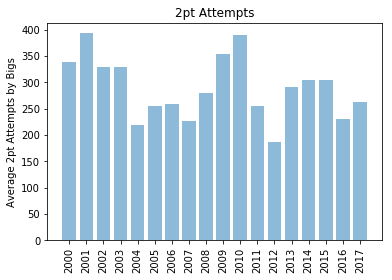

In [48]:
#Creating the bar plot to show 2pt attempts over the years
height_in_order = [338.9750124937531,393.37733605164794,329.96759711106773,
                  329.07307178802506,218.5025590551181,255.26198347107436,
                  259.2928783614759,226.94725358642884,279.85871566054243,
                  353.4195455960162,390.1365324706446,256.0309936802474,
                  187.41673163885855,292.17544642857143,304.2337837837838,
                  304.3283216783217,231.6014598146951,263.58414516248973]
years = ('2000','2001','2002','2003','2004','2005','2006','2007','2008',
         '2009','2010','2011','2012',
        '2013','2014','2015','2016','2017')

width = .5

plt.bar(years, height_in_order, alpha = .5)
plt.xticks(years, rotation = 'vertical')
plt.ylabel("Average 2pt Attempts by Bigs")
plt.title("2pt Attempts")

plt.show()

In [49]:
# For the next few cells I am stealing code from Ovais to incorporate
 #his for loop to isoloate years and positions

In [84]:
#get Data files and turn into DataFrames

nba_data_excel = "NBA+Data.xlsx"
player_data_excel = "player_heightweight_data(cleanedinches).xlsm"

hoops_data = pd.read_excel(nba_data_excel)
height_weight_df = pd.read_excel(player_data_excel)


In [85]:
#drop N/A values in year: nba_data_df

nba_data_df = hoops_data[hoops_data.Year >= 1990]
nba_data_df['Year'] = nba_data_df.Year.fillna(0)

#convert year into integer value
nba_data_df['Year'] = nba_data_df.Year.astype(int)

#Change 'Player' column to 'name'
nba_data_df = nba_data_df.rename(columns={"Player":"name"})

#Preview nba_data_df

nba_data_df.head()



C:\Users\andre\Anaconda3_second_attempt\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\andre\Anaconda3_second_attempt\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,Year,name,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
9547,1990,Mark Acres,C,27.0,ORL,80.0,50.0,1691.0,8.3,0.536,...,0.692,154.0,277.0,431.0,67.0,36.0,25.0,70.0,248.0,362.0
9548,1990,Michael Adams,PG,27.0,DEN,79.0,74.0,2690.0,15.4,0.542,...,0.850,49.0,176.0,225.0,495.0,121.0,3.0,141.0,133.0,1221.0
9549,1990,Mark Aguirre,SF,30.0,DET,78.0,40.0,2005.0,15.8,0.544,...,0.756,117.0,188.0,305.0,145.0,34.0,19.0,121.0,201.0,1099.0
9550,1990,Danny Ainge,PG,30.0,SAC,75.0,68.0,2727.0,16.1,0.528,...,0.831,69.0,257.0,326.0,453.0,113.0,18.0,185.0,238.0,1342.0
9551,1990,Mark Alarie,PF,26.0,WSB,82.0,10.0,1893.0,14.1,0.510,...,0.812,151.0,223.0,374.0,142.0,60.0,39.0,101.0,219.0,860.0


In [86]:
#drop N/A values in year: nba_data_df
height_weight_df['weight'] = height_weight_df.weight.fillna(0)

#Convert weight into integer value: height_weight_df
height_weight_df['weight'] = height_weight_df.weight.astype(int)

#Preview
height_weight_df.head()

,name,position,weight,height (inches),height(feet)
0,Alaa Abdelnaby,F-C,240,82,6ft 10in
1,Zaid Abdul-Aziz,NaN,235,81,6ft 9in
2,Kareem Abdul-Jabbar,C,225,86,7ft 2in
3,Mahmoud Abdul-Rauf,G,162,73,6ft 1in
4,Tariq Abdul-Wahad,F,223,78,6ft 6in


In [87]:
#Merge Both DataFrames on: 'name' column

merged_df = pd.merge(nba_data_df, height_weight_df)
merged_df.head()

,Year,name,Pos,Age,Tm,G,GS,MP,PER,TS%,...,AST,STL,BLK,TOV,PF,PTS,position,weight,height (inches),height(feet)
0,1990,Mark Acres,C,27.0,ORL,80.0,50.0,1691.0,8.3,0.536,...,67.0,36.0,25.0,70.0,248.0,362.0,F-C,220,83,6ft 11in
1,1991,Mark Acres,C,28.0,ORL,68.0,0.0,1313.0,9.2,0.551,...,25.0,25.0,25.0,42.0,218.0,285.0,F-C,220,83,6ft 11in
2,1992,Mark Acres,C,29.0,ORL,68.0,6.0,926.0,10.1,0.576,...,22.0,25.0,15.0,33.0,140.0,208.0,F-C,220,83,6ft 11in
3,1993,Mark Acres,C,30.0,TOT,18.0,7.0,269.0,8.9,0.571,...,5.0,3.0,6.0,13.0,34.0,64.0,F-C,220,83,6ft 11in
4,1993,Mark Acres,C,30.0,HOU,6.0,0.0,23.0,-0.6,0.304,...,0.0,0.0,0.0,2.0,2.0,6.0,F-C,220,83,6ft 11in


In [88]:
#remove 'unnamed' and position columns

complete_df = merged_df.drop(["Pos"],axis=1)

#preview DataFrame: complete_df
complete_df.head()

,Year,name,Age,Tm,G,GS,MP,PER,TS%,3PAr,...,AST,STL,BLK,TOV,PF,PTS,position,weight,height (inches),height(feet)
0,1990,Mark Acres,27.0,ORL,80.0,50.0,1691.0,8.3,0.536,0.014,...,67.0,36.0,25.0,70.0,248.0,362.0,F-C,220,83,6ft 11in
1,1991,Mark Acres,28.0,ORL,68.0,0.0,1313.0,9.2,0.551,0.014,...,25.0,25.0,25.0,42.0,218.0,285.0,F-C,220,83,6ft 11in
2,1992,Mark Acres,29.0,ORL,68.0,6.0,926.0,10.1,0.576,0.020,...,22.0,25.0,15.0,33.0,140.0,208.0,F-C,220,83,6ft 11in
3,1993,Mark Acres,30.0,TOT,18.0,7.0,269.0,8.9,0.571,0.041,...,5.0,3.0,6.0,13.0,34.0,64.0,F-C,220,83,6ft 11in
4,1993,Mark Acres,30.0,HOU,6.0,0.0,23.0,-0.6,0.304,0.222,...,0.0,0.0,0.0,2.0,2.0,6.0,F-C,220,83,6ft 11in


In [89]:

#Filter Years to desired years: we want form 2000 to 2017

my_filter = complete_df.Year >= 1990
desired_years_df = complete_df[my_filter]

#Sort values by 'Years' column

desired_years_df = desired_years_df.sort_values(by=['Year'])

#Reset Index

desired_years_df = desired_years_df.reset_index()

#Delete 'index' column

desired_years_df = desired_years_df.drop(['index'], axis=1)

#preview DataFrame: desired_years_df

desired_years_df.head()

,Year,name,Age,Tm,G,GS,MP,PER,TS%,3PAr,...,AST,STL,BLK,TOV,PF,PTS,position,weight,height (inches),height(feet)
0,1990,Mark Acres,27.0,ORL,80.0,50.0,1691.0,8.3,0.536,0.014,...,67.0,36.0,25.0,70.0,248.0,362.0,F-C,220,83,6ft 11in
1,1990,Lanard Copeland,24.0,PHI,23.0,0.0,110.0,10.0,0.499,0.074,...,9.0,1.0,1.0,19.0,12.0,74.0,G,190,78,6ft 6in
2,1990,Dennis Hopson,24.0,NJN,79.0,64.0,2551.0,13.6,0.503,0.092,...,151.0,100.0,51.0,168.0,183.0,1251.0,G-F,200,77,6ft 5in
3,1990,Wayne Cooper,33.0,POR,79.0,0.0,1176.0,10.6,0.469,0.010,...,44.0,18.0,95.0,39.0,211.0,301.0,C-F,220,82,6ft 10in
4,1990,Michael Cooper,33.0,LAL,80.0,10.0,1851.0,9.6,0.482,0.318,...,215.0,67.0,36.0,91.0,206.0,515.0,G-F,170,77,6ft 5in


In [105]:
#if statement grouping all big men into a new column called 'Big Men'
#groupby 'big men' and then grab only values for each year you need
# create a dataframe that only grabs the column 'big men'

#desired_years_df["bm"] = desired_years_df.eval("position == 'C' or 'position' == 'F' or position == 'F-C' or positon == 'C-F'") # , 
#                                                inplace = True)


def f(row):
    if row ['position'] == 'C' or row ['position'] == 'F' or row ['position'] == 'C-F' or row ['position'] == 'F-C':
        val = 'bm'
    else: 
        val = 'sm' 
    return val

desired_years_df['bm'] = desired_years_df.apply(f, axis = 1)

#print(desired_years_df[['position','bm']])
type(desired_years_df)
desired_years_df.columns
desired_years_df.head()

,Year,name,Age,Tm,G,GS,MP,PER,TS%,3PAr,...,STL,BLK,TOV,PF,PTS,position,weight,height (inches),height(feet),bm
0,1990,Mark Acres,27.0,ORL,80.0,50.0,1691.0,8.3,0.536,0.014,...,36.0,25.0,70.0,248.0,362.0,F-C,220,83,6ft 11in,bm
1,1990,Lanard Copeland,24.0,PHI,23.0,0.0,110.0,10.0,0.499,0.074,...,1.0,1.0,19.0,12.0,74.0,G,190,78,6ft 6in,sm
2,1990,Dennis Hopson,24.0,NJN,79.0,64.0,2551.0,13.6,0.503,0.092,...,100.0,51.0,168.0,183.0,1251.0,G-F,200,77,6ft 5in,sm
3,1990,Wayne Cooper,33.0,POR,79.0,0.0,1176.0,10.6,0.469,0.010,...,18.0,95.0,39.0,211.0,301.0,C-F,220,82,6ft 10in,bm
4,1990,Michael Cooper,33.0,LAL,80.0,10.0,1851.0,9.6,0.482,0.318,...,67.0,36.0,91.0,206.0,515.0,G-F,170,77,6ft 5in,sm


In [107]:
sm_df = desired_years_df.groupby(['Year','bm'])
#sm_info = desired_years_df.groupby(['Year','sm'])
#sm_df.head()
type(sm_df)

sm_df.head()
#sm_df.MP.mean()

##--New DataFrame--#

small_men_df = desired_years_df[desired_years_df['bm']== 'sm']
small_men_df

,Year,name,Age,Tm,G,GS,MP,PER,TS%,3PAr,...,STL,BLK,TOV,PF,PTS,position,weight,height (inches),height(feet),bm
1,1990,Lanard Copeland,24.0,PHI,23.0,0.0,110.0,10.0,0.499,0.074,...,1.0,1.0,19.0,12.0,74.0,G,190,78,6ft 6in,sm
2,1990,Dennis Hopson,24.0,NJN,79.0,64.0,2551.0,13.6,0.503,0.092,...,100.0,51.0,168.0,183.0,1251.0,G-F,200,77,6ft 5in,sm
4,1990,Michael Cooper,33.0,LAL,80.0,10.0,1851.0,9.6,0.482,0.318,...,67.0,36.0,91.0,206.0,515.0,G-F,170,77,6ft 5in,sm
7,1990,Jeff Hornacek,26.0,PHO,67.0,60.0,2278.0,19.6,0.596,0.109,...,117.0,14.0,125.0,144.0,1179.0,G,190,75,6ft 3in,sm
8,1990,Kenny Payne,23.0,PHI,35.0,4.0,216.0,10.7,0.492,0.093,...,7.0,6.0,20.0,37.0,114.0,F-G,195,80,6ft 8in,sm
9,1990,Lester Conner,30.0,NJN,82.0,61.0,2355.0,12.8,0.486,0.023,...,172.0,8.0,138.0,182.0,648.0,G,180,76,6ft 4in,sm
10,1990,John Paxson,29.0,CHI,82.0,82.0,2365.0,12.7,0.555,0.130,...,83.0,6.0,85.0,176.0,819.0,G,185,74,6ft 2in,sm
11,1990,Steve Colter,27.0,WSB,73.0,1.0,977.0,15.9,0.533,0.017,...,47.0,10.0,38.0,98.0,361.0,G,165,75,6ft 3in,sm
12,1990,Danny Young,27.0,POR,82.0,8.0,1393.0,11.5,0.508,0.180,...,82.0,4.0,80.0,84.0,383.0,G,175,75,6ft 3in,sm
18,1990,Eddie Hughes,29.0,DEN,60.0,7.0,892.0,8.3,0.482,0.243,...,48.0,1.0,39.0,87.0,209.0,G,165,70,5ft 10in,sm


In [104]:
#y = sm_df.MP.mean()
sample = sm_df

sample.head()

#sample_bm = sample.loc[sample["bm"]=="bm"]




sm_df.head()

,Year,name,Age,Tm,G,GS,MP,PER,TS%,3PAr,...,STL,BLK,TOV,PF,PTS,position,weight,height (inches),height(feet),bm
0,1990,Mark Acres,27.0,ORL,80.0,50.0,1691.0,8.3,0.536,0.014,...,36.0,25.0,70.0,248.0,362.0,F-C,220,83,6ft 11in,bm
1,1990,Lanard Copeland,24.0,PHI,23.0,0.0,110.0,10.0,0.499,0.074,...,1.0,1.0,19.0,12.0,74.0,G,190,78,6ft 6in,sm
2,1990,Dennis Hopson,24.0,NJN,79.0,64.0,2551.0,13.6,0.503,0.092,...,100.0,51.0,168.0,183.0,1251.0,G-F,200,77,6ft 5in,sm
3,1990,Wayne Cooper,33.0,POR,79.0,0.0,1176.0,10.6,0.469,0.010,...,18.0,95.0,39.0,211.0,301.0,C-F,220,82,6ft 10in,bm
4,1990,Michael Cooper,33.0,LAL,80.0,10.0,1851.0,9.6,0.482,0.318,...,67.0,36.0,91.0,206.0,515.0,G-F,170,77,6ft 5in,sm
5,1990,Tito Horford,24.0,MIL,35.0,0.0,236.0,5.1,0.351,0.000,...,5.0,16.0,14.0,33.0,51.0,C,245,85,7ft 1in,bm
6,1990,Will Perdue,24.0,CHI,77.0,11.0,884.0,9.1,0.469,0.019,...,19.0,26.0,65.0,150.0,294.0,C,240,85,7ft 1in,bm
7,1990,Jeff Hornacek,26.0,PHO,67.0,60.0,2278.0,19.6,0.596,0.109,...,117.0,14.0,125.0,144.0,1179.0,G,190,75,6ft 3in,sm
8,1990,Kenny Payne,23.0,PHI,35.0,4.0,216.0,10.7,0.492,0.093,...,7.0,6.0,20.0,37.0,114.0,F-G,195,80,6ft 8in,sm
13,1990,Ben Coleman,28.0,MIL,22.0,0.0,305.0,12.2,0.548,0.010,...,7.0,7.0,26.0,54.0,126.0,F,235,81,6ft 9in,bm


In [59]:
#sm_data.columns

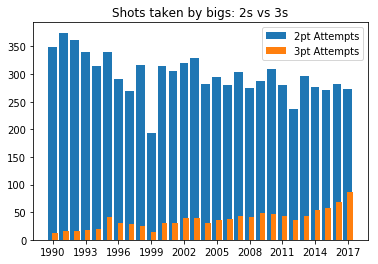

In [118]:
#creating a plot for all big men 3 pt attempts
three_pt_att_gb = sm_df['3PA'].mean()
two_pt_att_gb = sm_df['2PA'].mean()
three_pt_att_gb = three_pt_att_gb.reset_index()
two_pt_att_gb = two_pt_att_gb.reset_index()


#sample.head()
#plt.bar(sample['Year'], sample.MP)

three_pt_att_bm = three_pt_att_gb.loc[three_pt_att_gb["bm"]=="bm"]
two_pt_att_bm = two_pt_att_gb.loc[two_pt_att_gb['bm']=='bm']

plt.bar(two_pt_att_bm['Year'] + 0, two_pt_att_bm['2PA'], width = .8,
      label = '2pt Attempts')
plt.bar(three_pt_att_bm['Year'] + 0.2, three_pt_att_bm['3PA'], width = 0.5,
      label = '3pt Attempts')
plt.xticks(np.arange(1990,2018, step=3))
plt.legend()
plt.title('Shots taken by bigs: 2s vs 3s')

plt.show()

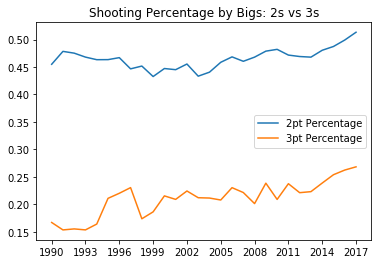

In [110]:
#create a graph for 2pt vs 3pt percentages
three_pt_perc = sm_df['3P%'].mean()
two_pt_perc = sm_df['2P%'].mean()

three_pt_perc = three_pt_perc.reset_index()
two_pt_perc = two_pt_perc.reset_index()


#sample.head()
#plt.bar(sample['Year'], sample.MP)

three_pt_perc_bm = three_pt_perc.loc[three_pt_perc["bm"]=="bm"]
two_pt_perc_bm = two_pt_perc.loc[two_pt_perc['bm']=='bm']

plt.plot(two_pt_perc_bm['Year'], two_pt_perc_bm['2P%'],
      label = '2pt Percentage')
plt.plot(three_pt_perc_bm['Year'], three_pt_perc_bm['3P%'], 
      label = '3pt Percentage')
plt.xticks(np.arange(1990,2018, step=3))
plt.legend()
plt.title('Shooting Percentage by Bigs: 2s vs 3s')

plt.show()

In [120]:
#creating a plot to compare 3PAr vs 2PAr

#creating a plot for all big men 3 pt attempts
three_pt_att_rate = sm_df['3PAr'].mean()
three_pt_att_rate_sm = small_men_df['3PAr'].mean()

three_pt_att_rate = three_pt_att_rate.reset_index()
#three_pt_att_rate_sm = three_pt_att_rate_sm.reset_index()



three_pt_att_rate_bm = three_pt_att_rate.loc[three_pt_att_rate["bm"]=="bm"]
#three_pt_att_rate_sm_graph = three_pt_att_rate_sm.loc[three_pt_att_rate_sm['bm']=='sm']

plt.plot(three_pt_att_rate_sm['Year'], three_pt_att_rate_sm['3PAr'], label = 'Small Men')
plt.plot(three_pt_att_rate_bm['Year'], 
         three_pt_att_rate_bm['3PAr'], 
         #width = 2, 
         label = 'Big Men')
plt.xticks(np.arange(1990,2018, step=3))
plt.legend()
plt.title('3Pt Attempt Rate: Bigs vs Smalls')

plt.show()

TypeError: 'float' object is not subscriptable

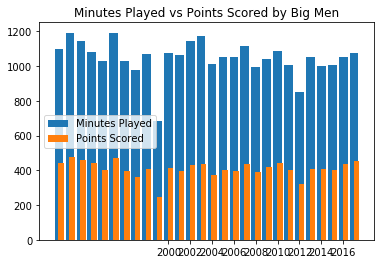

In [114]:
#Create a plot comparing MP vs PTS
mp = sm_df['MP'].mean()
pts = sm_df['PTS'].mean()
mp = mp.reset_index()
pts = pts.reset_index()


#sample.head()
#plt.bar(sample['Year'], sample.MP)

mp_bm = mp.loc[mp["bm"]=="bm"]
pts_bm = pts.loc[pts['bm']=='bm']

plt.bar(mp_bm['Year'] + 0, mp_bm['MP'], width = .8,
      label = 'Minutes Played')
plt.bar(pts_bm['Year'] + 0.2, pts_bm['PTS'], width = 0.5,
      label = 'Points Scored')
plt.xticks(np.arange(2000,2018, step=2))
plt.legend(loc = 'center left')
#rcParams['legend.loc'] = 10

plt.title('Minutes Played vs Points Scored by Big Men')

plt.show()

In [ ]:
sm_data.columns

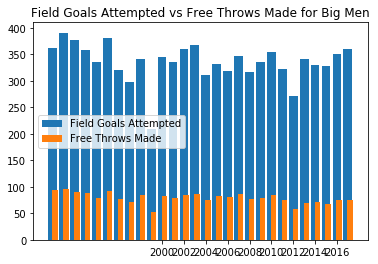

In [121]:
#create a plot comparing FT vs FGA
fga = sm_df['FGA'].mean()
ft = sm_df['FT'].mean()

fga = fga.reset_index()
ft = ft.reset_index()


#sample.head()
#plt.bar(sample['Year'], sample.MP)

fga_bm = fga.loc[fga["bm"]=="bm"]
ft_bm = ft.loc[ft['bm']=='bm']

plt.bar(fga_bm['Year'] + 0, fga_bm['FGA'], width = .8,
      label = 'Field Goals Attempted')
plt.bar(ft_bm['Year'] + 0.2, ft_bm['FT'], width = 0.5,
      label = 'Free Throws Made')
plt.xticks(np.arange(2000,2018, step=2))
plt.legend(loc = 'center left')

plt.title('Field Goals Attempted vs Free Throws Made for Big Men')

plt.show()

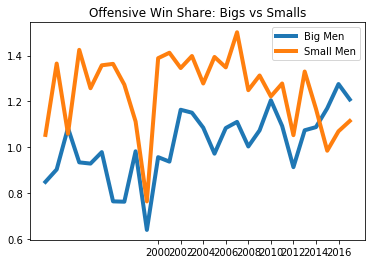

In [122]:
#Creating a graph for offensive win shares
bm_ows = sm_df['OWS'].mean()
sm_ows = sm_df['OWS'].mean()

bm_ows = bm_ows.reset_index()
sm_ows = sm_ows.reset_index()


bm_ows_graph = bm_ows.loc[bm_ows["bm"]=="bm"]
sm_ows_graph = sm_ows.loc[sm_ows['bm']=='sm']

plt.plot(bm_ows_graph['Year'], bm_ows_graph['OWS'],
      label = 'Big Men', linewidth = 4)
plt.plot(sm_ows_graph['Year'], sm_ows_graph['OWS'], 
      label = 'Small Men', linewidth = 4)
plt.xticks(np.arange(2000,2018, step=2))
plt.legend()
plt.title('Offensive Win Share: Bigs vs Smalls')

plt.show()

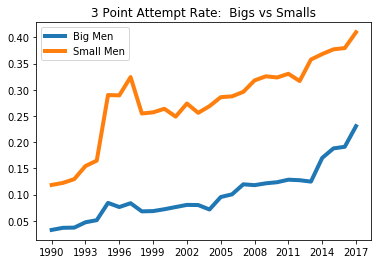

In [125]:
#3PAr for smalls vs bigs
bm_ar = sm_df['3PAr'].mean()
sm_ar = sm_df['3PAr'].mean()

bm_ar = bm_ar.reset_index()
sm_ar = sm_ar.reset_index()


bm_ar_graph = bm_ar.loc[bm_ows["bm"]=="bm"]
sm_ar_graph = sm_ar.loc[sm_ows['bm']=='sm']

plt.plot(bm_ar_graph['Year'], bm_ar_graph['3PAr'],
      label = 'Big Men', linewidth = 4)
plt.plot(sm_ar_graph['Year'], sm_ar_graph['3PAr'], 
      label = 'Small Men', linewidth = 4)
plt.xticks(np.arange(1990,2018, step=3))
plt.legend()
plt.title('3 Point Attempt Rate:  Bigs vs Smalls')

plt.show()

In [137]:
best_c = sm_df['PER'].max()

#best_c.get_group(1995,'C')
type(best_c)
best_c = best_c.to_frame()
best_c.head()

PER
Year bm      
1990 bm  22.9
     sm  26.1
1991 bm  76.3
     sm  44.3
1992 bm  32.4

In [ ]:
# Starting on Logan's code.  Cleaning up the plots a bit
y = sm_df.PER.mean() 
per = y.reset_index()

per.head()

#plt.bar(sample['Year'], sample.MP)

per_bm = per.loc[per["bm"]=="bm"] 
per_sm = per.loc[per["bm"]=="sm"]

In [ ]:
plt.plot(per_bm['Year'],per_bm['PER'], color = "red", label = 'Big Men',
        linewidth = 2)
plt.plot(per_sm["Year"], per_sm["PER"], color = "blue", label = 'Small Men',
        linewidth = 2)
plt.xticks(np.arange(2000,2018, step=2))
#plt.figure(figsize=(100,100))
plt.legend()
plt.title('Player Efficiency Rating')

plt.show()

In [ ]:
y = sm_df.MP.mean()
sample = y.reset_index()

sample.head()
#plt.bar(sample['Year'], sample.MP)

sample_bm = sample.loc[sample["bm"]=="bm"]

In [ ]:
plt.bar(sample_bm['Year'],sample_bm['MP'])
plt.xticks(np.arange(2000,2018, step=4))
plt.figure(figsize=(100,100))

plt.show()

In [ ]:
desired_years_df.columns

In [ ]:


two_thousand = desired_years_df.loc[desired_years_df["Year"]==2000]

center = two_thousand.loc[two_thousand["position"]== "C"]
for_cent = two_thousand.loc[two_thousand["position"]== "F-C"]
cent_for = two_thousand.loc[two_thousand['position']== 'C-F']
forward = two_thousand.loc[two_thousand["position"]== "F"]

In [ ]:
#for i in range (1,18):
    

two_thousand_one = desired_years_df.loc[desired_years_df["Year"]==2001]
center_1 = two_thousand_one.loc[two_thousand_one["position"]== "C"]
for_cent_i = two_thousand_one.loc[two_thousand_one["position"]== "F-C"]
cent_for_i = two_thousand_one.loc[two_thousand_one['position']== 'C-F']
forward_i = two_thousand_one.loc[two_thousand_one["position"]== "F"]

In [ ]:
two_thousand_two = desired_years_df.loc[desired_years_df["Year"]==2002]
center_2 = two_thousand_two.loc[two_thousand_two["position"]== "C"]
for_cent_2 = two_thousand_two.loc[two_thousand_two["position"]== "F-C"]
forward_2 = two_thousand_two.loc[two_thousand_two["position"]== "F"]

In [ ]:
two_thousand_three = desired_years_df.loc[desired_years_df["Year"]==2003]
center_3 = two_thousand_three.loc[two_thousand_three["position"]== "C"]
for_cent_3 = two_thousand_three.loc[two_thousand_three["position"]== "F-C"]
forward_3 = two_thousand_three.loc[two_thousand_three["position"]== "F"]

In [ ]:
two_thousand_four = desired_years_df.loc[desired_years_df["Year"]==2004]
center_4 = two_thousand_four.loc[two_thousand_four["position"]== "C"]
for_cent_4 = two_thousand_four.loc[two_thousand_four["position"]== "F-C"]
forward_4 = two_thousand_four.loc[two_thousand_four["position"]== "F"]

In [ ]:
two_thousand_five = desired_years_df.loc[desired_years_df["Year"]==2005]
center_5 = two_thousand_five.loc[two_thousand_five["position"]== "C"]
for_cent_5 = two_thousand_five.loc[two_thousand_five["position"]== "F-C"]
forward_5 = two_thousand_five.loc[two_thousand_five["position"]== "F"]

In [ ]:
two_thousand_six = desired_years_df.loc[desired_years_df["Year"]==2006]
center_6 = two_thousand_six.loc[two_thousand_six["position"]== "C"]
for_cent_6 = two_thousand_six.loc[two_thousand_six["position"]== "F-C"]
forward_6 = two_thousand_six.loc[two_thousand_six["position"]== "F"]

In [ ]:
two_thousand_seven = desired_years_df.loc[desired_years_df["Year"]==2007]
center_7 = two_thousand_seven.loc[two_thousand_seven["position"]== "C"]
for_cent_7 = two_thousand_seven.loc[two_thousand_seven["position"]== "F-C"]
forward_7 = two_thousand_seven.loc[two_thousand_seven["position"]== "F"]

In [ ]:
two_thousand_eight = desired_years_df.loc[desired_years_df["Year"]==2008]
center_8 = two_thousand_eight.loc[two_thousand_eight["position"]== "C"]
for_cent_8 = two_thousand_eight.loc[two_thousand_eight["position"]== "F-C"]
forward_8 = two_thousand_eight.loc[two_thousand_eight["position"]== "F"]

In [ ]:
two_thousand_nine = desired_years_df.loc[desired_years_df["Year"]==2009]
center_9 = two_thousand_nine.loc[two_thousand_nine["position"]== "C"]
for_cent_9 = two_thousand_nine.loc[two_thousand_nine["position"]== "F-C"]
forward_9 = two_thousand_nine.loc[two_thousand_nine["position"]== "F"]

In [ ]:
two_thousand_ten = desired_years_df.loc[desired_years_df["Year"]==2010]
center_10 = two_thousand_ten.loc[two_thousand_ten["position"]== "C"]
for_cent_10 = two_thousand_ten.loc[two_thousand_ten["position"]== "F-C"]
forward_10 = two_thousand_ten.loc[two_thousand_ten["position"]== "F"]

In [ ]:
two_thousand_eleven = desired_years_df.loc[desired_years_df["Year"]==2011]
center_11 = two_thousand_eleven.loc[two_thousand_eleven["position"]== "C"]
for_cent_11 = two_thousand_eleven.loc[two_thousand_eleven["position"]== "F-C"]
forward_11 = two_thousand_eleven.loc[two_thousand_eleven["position"]== "F"]

In [ ]:
two_thousand_twelve = desired_years_df.loc[desired_years_df["Year"]==2012]
center_12 = two_thousand_twelve.loc[two_thousand_twelve["position"]== "C"]
for_cent_12 = two_thousand_twelve.loc[two_thousand_twelve["position"]== "F-C"]
forward_12 = two_thousand_twelve.loc[two_thousand_twelve["position"]== "F"]

In [ ]:
two_thousand_thirteen = desired_years_df.loc[desired_years_df["Year"]==2013]
center_13 = two_thousand_thirteen.loc[two_thousand_thirteen["position"]== "C"]
for_cent_13 = two_thousand_thirteen.loc[two_thousand_thirteen["position"]== "F-C"]
forward_13 = two_thousand_thirteen.loc[two_thousand_thirteen["position"]== "F"]

In [ ]:
two_thousand_fourteen = desired_years_df.loc[desired_years_df["Year"]==2014]
center_14 = two_thousand_fourteen.loc[two_thousand_fourteen["position"]== "C"]
for_cent_14 = two_thousand_fourteen.loc[two_thousand_fourteen["position"]== "F-C"]
forward_14 = two_thousand_fourteen.loc[two_thousand_fourteen["position"]== "F"]

In [ ]:
two_thousand_fifteen = desired_years_df.loc[desired_years_df["Year"]==2015]
center_15 = two_thousand_fifteen.loc[two_thousand_fifteen["position"]== "C"]
for_cent_15 = two_thousand_fifteen.loc[two_thousand_fifteen["position"]== "F-C"]
forward_15 = two_thousand_fifteen.loc[two_thousand_fifteen["position"]== "F"]

In [ ]:
two_thousand_sixteen = desired_years_df.loc[desired_years_df["Year"]==2016]
center_16 = two_thousand_sixteen.loc[two_thousand_sixteen["position"]== "C"]
for_cent_16 = two_thousand_sixteen.loc[two_thousand_sixteen["position"]== "F-C"]
forward_16 = two_thousand_sixteen.loc[two_thousand_sixteen["position"]== "F"]

In [ ]:
two_thousand_seventeen = desired_years_df.loc[desired_years_df["Year"]==2017]
center_17 = two_thousand_seventeen.loc[two_thousand_seventeen["position"]== "C"]
for_cent_17 = two_thousand_seventeen.loc[two_thousand_seventeen["position"]== "F-C"]
forward_17 = two_thousand_seventeen.loc[two_thousand_seventeen["position"]== "F"]

In [ ]:
x= [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
y_three_pt_att = [center["3PA"].mean(),center_1["3PA"].mean(),center_2["3PA"].mean(), 
                  center_3["3PA"].mean(), center_4["3PA"].mean(), center_5["3PA"].mean(), 
                  center_6["3PA"].mean(), center_7["3PA"].mean(), center_8["3PA"].mean(),
                  center_9["3PA"].mean(), center_10["3PA"].mean(), center_11["3PA"].mean(), 
                  center_12["3PA"].mean(), center_13["3PA"].mean(),center_14["3PA"].mean(),
                  center_15["3PA"].mean(),center_16["3PA"].mean(),center_17["3PA"].mean()]
#plt.savefig("Logan_Images/3PA Plot.png")
plt.plot(x,y_three_pt_att, label = '3 Pt Attempts')

In [ ]:
x= [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
y_two_pt_att = [center["2PA"].mean(),center_1["2PA"].mean(),center_2["2PA"].mean(), center_3["2PA"].mean(), center_4["2PA"].mean(), 
center_5["2PA"].mean(), center_6["2PA"].mean(), center_7["2PA"].mean(), center_8["2PA"].mean(), center_9["2PA"].mean(),
center_10["2PA"].mean(), center_11["2PA"].mean(), center_12["2PA"].mean(), center_13["2PA"].mean(), center_14["2PA"].mean(),
center_15["2PA"].mean(),center_16["2PA"].mean(),center_17["2PA"].mean()]
#plt.savefig("Logan_Images/3PA Plot.png")

#labels = ['2 Pt Attempts', '3 Pt Attempts']

plt.bar(x, y_two_pt_att, label = '2 Pt Attempts')
plt.bar(x, y_three_pt_att, label = '3 Pt Attempts', bottom = y_two_pt_att)


#for y_arr, label in zip(y, labels):
 #   plt.plot((x,y_two_pt_att)
  #       (x,y_three_pt_att))
plt.legend()


In [ ]:
x= [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
y_two_pt_percent = [center["2P%"].mean(), center_1["2P%"].mean(), center_2["2P%"].mean(), center_3["2P%"].mean(), 
                center_4["2P%"].mean(), center_5["2P%"].mean(), center_6["2P%"].mean(), center_7["2P%"].mean(), 
                center_8["2P%"].mean(), center_9["2P%"].mean(), center_10["2P%"].mean(), center_11["2P%"].mean(), 
                center_12["2P%"].mean(), center_13["2P%"].mean(), center_14["2P%"].mean(), center_15["2P%"].mean(),
                center_16["2P%"].mean(), center_17["2P%"].mean()]

plt.plot(x, y_two_pt_percent, label = '2 Pt Percentage')

In [ ]:
x= [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
y_three_pt_percent = [center["3P%"].mean(),center_1["3P%"].mean(),center_2["3P%"].mean(), 
                  center_3["3P%"].mean(), center_4["3P%"].mean(), center_5["3P%"].mean(), 
                  center_6["3P%"].mean(), center_7["3P%"].mean(), center_8["3P%"].mean(),
                  center_9["3P%"].mean(), center_10["3P%"].mean(), center_11["3P%"].mean(), 
                  center_12["3P%"].mean(), center_13["3P%"].mean(),center_14["3P%"].mean(),
                  center_15["3P%"].mean(),center_16["3P%"].mean(),center_17["3P%"].mean()]

plt.plot(x, y_three_pt_percent, label = '3 Pt Percentage')
plt.plot(x, y_two_pt_percent, label = '2 Pt Percentage')

plt.legend()
plt.show()

In [ ]:
x= [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
y_three_par = [center["3PAr"].mean(),center_1["3PAr"].mean(),center_2["3PAr"].mean(), center_3["3PAr"].mean(), center_4["3PAr"].mean(), 
center_5["3PAr"].mean(), center_6["3PAr"].mean(), center_7["3PAr"].mean(), center_8["3PAr"].mean(), center_9["3PAr"].mean(),
center_10["3PAr"].mean(), center_11["3PAr"].mean(), center_12["3PAr"].mean(), center_13["3PAr"].mean(), center_14["3PAr"].mean(),
center_15["3PAr"].mean(),center_16["3PAr"].mean(),center_17["3PAr"].mean()]

plt.plot(x, y_three_par, label = '3 Pt Attempt Rate')

plt.legend()
plt.show()

In [ ]:
combo = 
combo_08 = 
combo_17 = 

In [ ]:
#set multi-index by year and name: year_name_df
#year_pos_df = complete_df.set_index(['Year',('Pos')])
year_pos_df = complete_df.set_index(['Year',('name')])
year_pos_df = year_pos_df.sort_index('name')('Dirk Nowitzki')
year_pos_df

In [ ]:
#Create a DataFrame only containing big men
big_men_df = year_pos_df[np.in1d(year_pos_df.index.get_level_values(1), ['C', 'C-PF', 'PF', 'PF-C'])]
big_men_df_2000 = year_pos_df[np.in1d(year_pos_df.index.get_level_values(0), [2000])]
big_men_df_2001 = year_pos_df[np.in1d(year_pos_df.index.get_level_values(0), [2001])]
#print(big_men_df_2000.head())

#Get the average 3PA for the year 2000
avg_threes_att_00 = big_men_df.loc[:]["3PA"].mean()
avg_threes_att_01 = big_men_df_2001.loc[:]['3PA'].mean()
avg_threes_att_01

In [ ]:
# Stealing Ovais' for loop

#Make a years list
years = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017]

#positions desired
positions = ['C','C-PF', 'PF', 'PF-C']

#Create some lists to append to


for year in years:
    #Create a DataFrame with index_level zero equal to the value of year
    df = year_pos_df[np.in1d(year_pos_df.index.get_level_values(0), [year])]
    for position in positions:
        #Create a DataFrame with index_level one equal to the value of position
        df = year_pos_df[np.in1d(year_pos_df.index.get_level_values(1), [position])]
        
        #Get stats
        threes = df.loc[:]["3PA"].mean()            
        print(f"{threes} for this {position}.")
